### 1. Import thư viện và đọc dữ liệu

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("dataset\METABRIC_RNA_Mutation.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\DUC AN\AppData\Local\Temp\ipykernel_3744\2828029461.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("dataset\METABRIC_RNA_Mutation.csv")
C:\Users\DUC AN\AppData\Local\Temp\ipykernel_3744\2828029461.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataset\METABRIC_RNA_Mutation.csv")


In [3]:
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### 2. Kiểm tra giá trị thiếu
##### - Mỗi cột trong bảng dữ liệu có thể có ô trống (missing value).
##### - Ví dụ: bảng thông tin bệnh nhân, có người chưa đo được HER2, ô đó để trống.
##### - df.isna().sum() đếm xem mỗi cột có bao nhiêu ô trống.
##### - Nếu nhiều ô trống, ta cần lấp đầy hoặc loại bỏ trước khi dùng cho machine learning.
##### -> Tóm tắt: kiểm tra xem cái danh sách bệnh nhân có chỗ nào thiếu thông tin không.


In [4]:
na_counts = df.isna().sum()
na_counts = na_counts[na_counts > 0]  

print(na_counts)

type_of_breast_surgery             22
cancer_type_detailed               15
cellularity                        54
er_status_measured_by_ihc          30
neoplasm_histologic_grade          72
tumor_other_histologic_subtype     15
primary_tumor_laterality          106
mutation_count                     45
oncotree_code                      15
3-gene_classifier_subtype         204
tumor_size                         20
tumor_stage                       501
death_from_cancer                   1
dtype: int64


### 3. Khám phá dữ liệu categorical (dạng chữ)

##### - Một số cột là dạng “category” (chữ, không phải số).
##### - Ví dụ her2_status có “Positive” hoặc “Negative”.
##### - .unique() cho biết trong cột này có bao nhiêu loại khác nhau.
##### - Giúp ta biết cách chuyển chữ thành số sau này (vì máy tính không hiểu chữ).

In [5]:
df["er_status_measured_by_ihc"].unique()

array(['Positve', 'Negative', nan], dtype=object)

In [6]:
df["her2_status_measured_by_snp6"].unique()

array(['NEUTRAL', 'LOSS', 'GAIN', 'UNDEF'], dtype=object)

In [7]:
df["her2_status"].unique()

array(['Negative', 'Positive'], dtype=object)

##### - Vẽ biểu đồ tần suất các giá trị của tumor_stage

In [8]:
df["tumor_stage"]

0       2.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1899    NaN
1900    NaN
1901    NaN
1902    NaN
1903    NaN
Name: tumor_stage, Length: 1904, dtype: float64

<Axes: xlabel='tumor_stage', ylabel='count'>

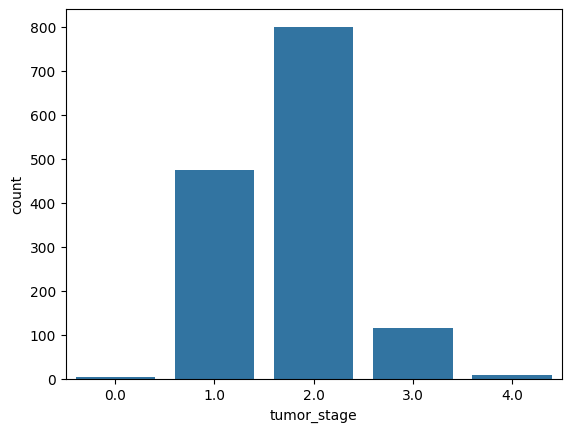

In [9]:
sns.countplot(df,x="tumor_stage")

### 4. Lựa chọn các feature quan trọng

##### - Trong bảng gốc có quá nhiều cột (cả gene expression + thông tin bệnh nhân).
##### - Chúng ta chỉ lấy những cột thật sự cần thiết để dự đoán.
##### - Giúp giảm phức tạp, dễ xử lý hơn

In [10]:
KEEP=["type_of_breast_surgery",
      "cancer_type",
      "cancer_type_detailed",
      "cellularity",
      "chemotherapy",
      "pam50_+_claudin-low_subtype",
      "neoplasm_histologic_grade",
      "her2_status",
      "hormone_therapy",
      'lymph_nodes_examined_positive',
      "nottingham_prognostic_index",
      "pr_status",
      "radio_therapy",
     ]


In [11]:
Categorical=["type_of_breast_surgery",
      "cancer_type",
      "cancer_type_detailed",
      "cellularity",
      "chemotherapy",
      "pam50_+_claudin-low_subtype",
      "neoplasm_histologic_grade",
      "her2_status",
      "hormone_therapy",
      "pr_status",
      "radio_therapy"
     ]

In [12]:
df_features=df[KEEP]

In [13]:
na_counts = df_features.isna().sum()
na_counts = na_counts[na_counts > 0]  

print(na_counts)

type_of_breast_surgery       22
cancer_type_detailed         15
cellularity                  54
neoplasm_histologic_grade    72
dtype: int64


### 5. Trực quan hóa phân phối các biến categorical

##### - Vẽ biểu đồ cột cho biết mỗi loại trong cột xuất hiện bao nhiêu lần.
##### - Ví dụ, có 50 bệnh nhân giai đoạn 1, 30 bệnh nhân giai đoạn 2.
##### - Giúp ta nhìn tổng quát dữ liệu và phát hiện nếu dữ liệu bị lệch.

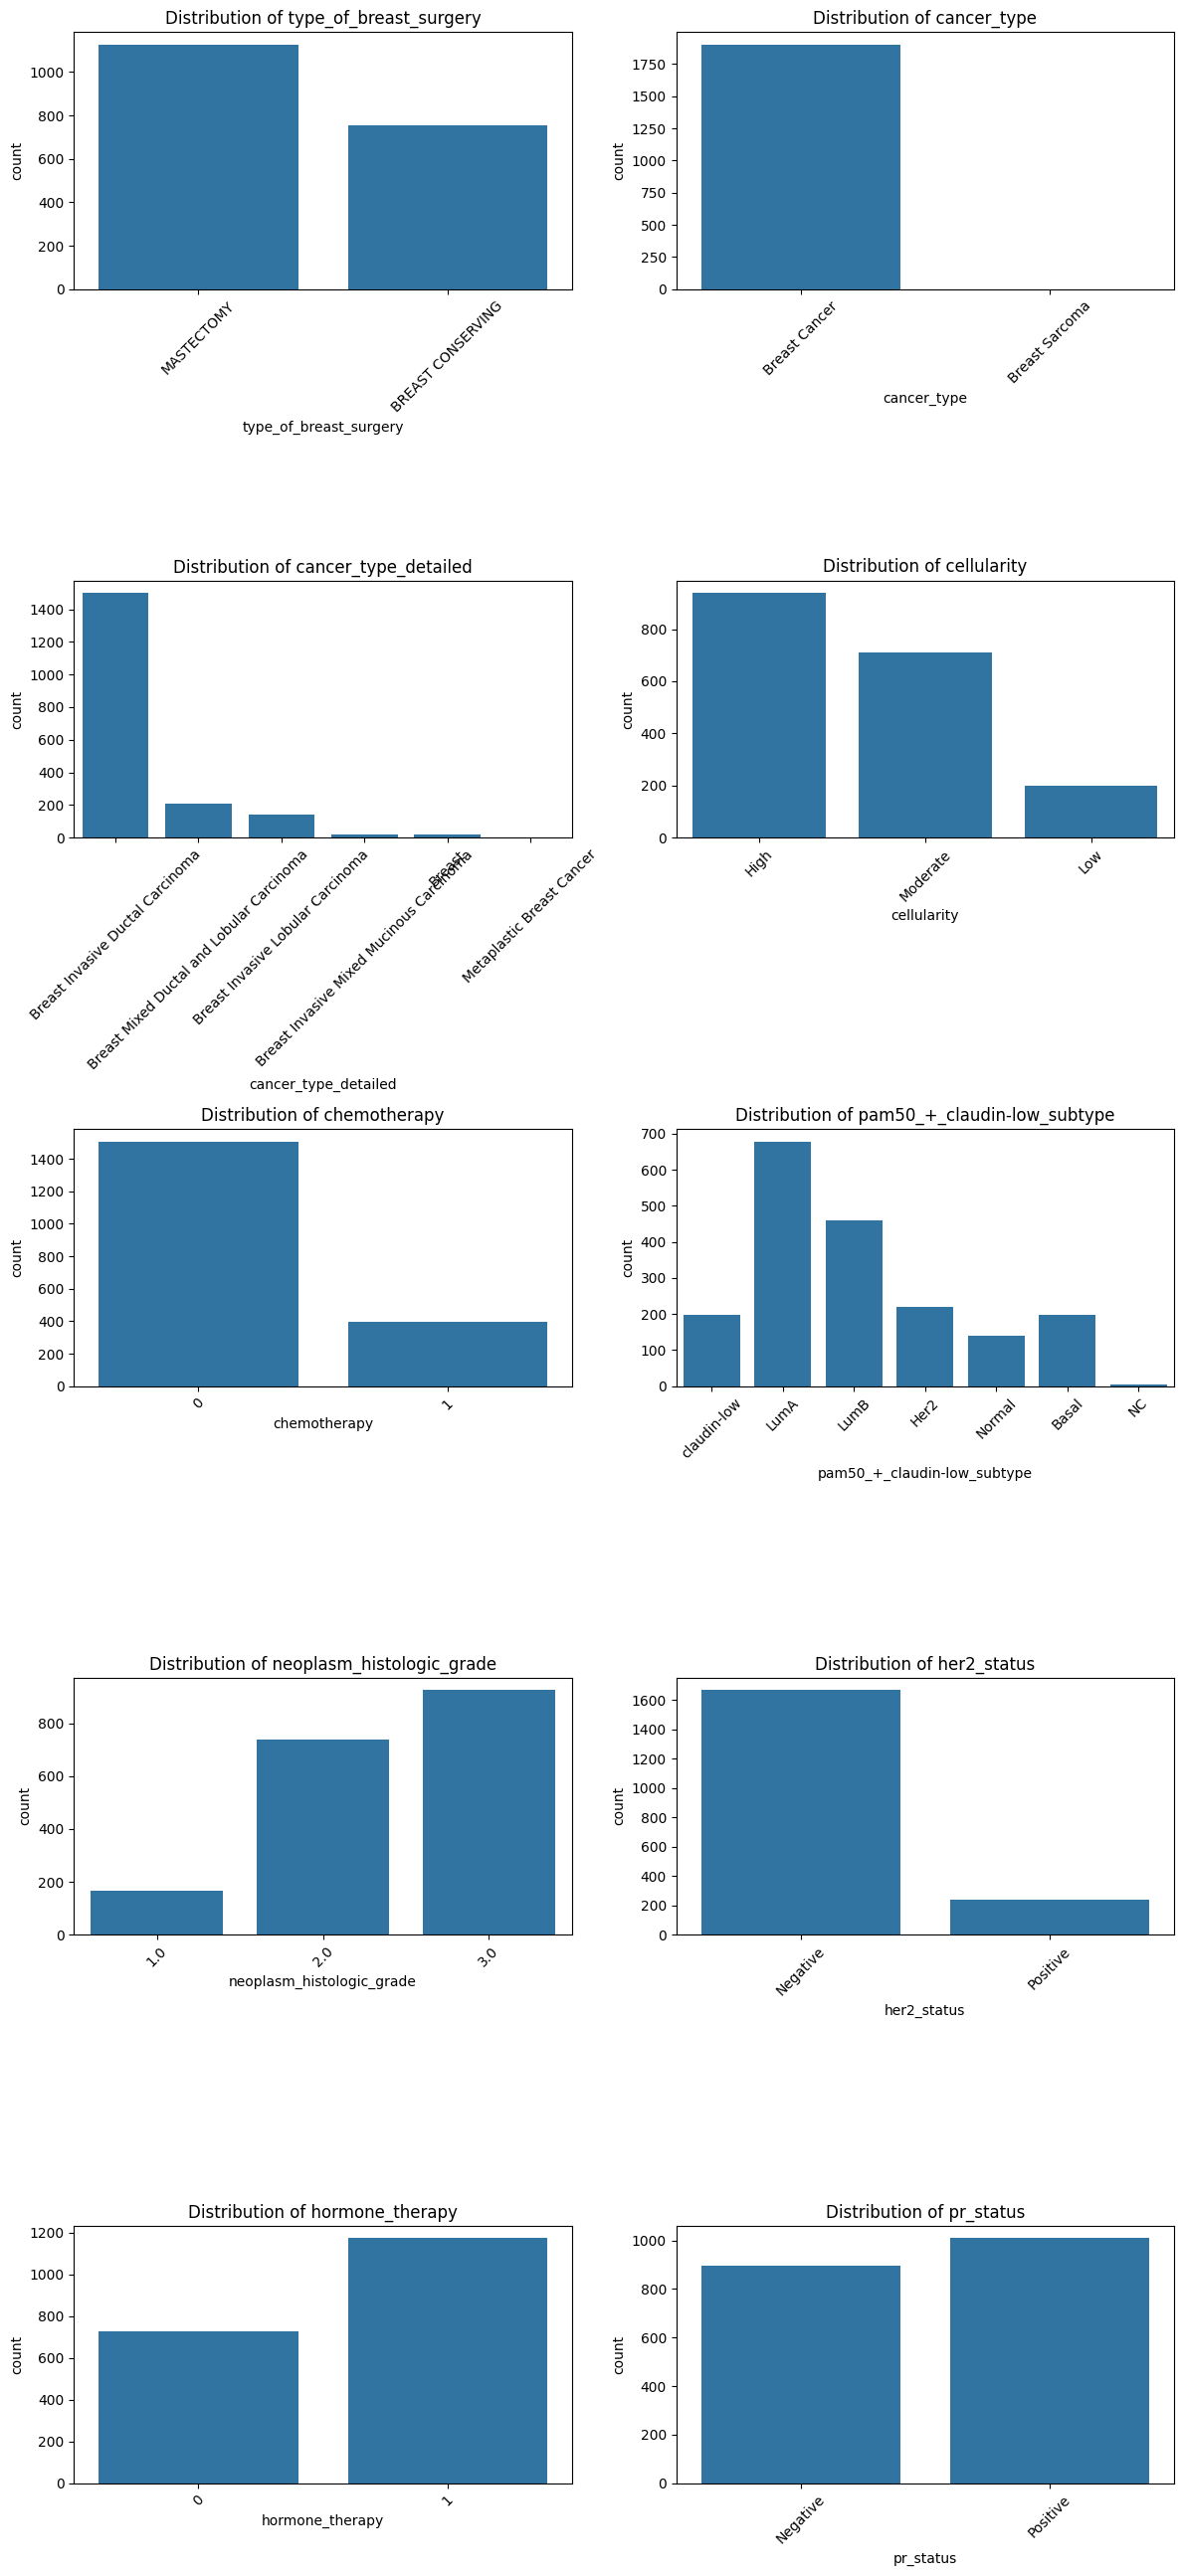

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=len(Categorical)//2, ncols=2, figsize=(12, 2*len(KEEP)))
axes=axes.flatten()
for col,ax in zip(Categorical,axes):
  
    sns.countplot(data=df, x=col,ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
   

In [15]:
# Xóa toàn bộ hàng có missing value
df_features = df_features.dropna()

print("Shape sau khi drop missing:", df_features.shape)


Shape sau khi drop missing: (1749, 13)


### 6. Xóa giá trị thiếu cho categorical (và toàn bộ dataset)

##### - Trong dữ liệu y khoa, việc điền ngẫu nhiên có thể tạo ra nhiễu.
##### - Do đó, thay vì điền, ta xóa luôn những hàng có dữ liệu thiếu.
##### - Như vậy, dataset chỉ giữ lại các bệnh nhân có thông tin đầy đủ.

In [16]:
df_features = df_features.dropna()

In [17]:
df_features.isna().sum()

type_of_breast_surgery           0
cancer_type                      0
cancer_type_detailed             0
cellularity                      0
chemotherapy                     0
pam50_+_claudin-low_subtype      0
neoplasm_histologic_grade        0
her2_status                      0
hormone_therapy                  0
lymph_nodes_examined_positive    0
nottingham_prognostic_index      0
pr_status                        0
radio_therapy                    0
dtype: int64

In [18]:
df_features.head()

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,neoplasm_histologic_grade,her2_status,hormone_therapy,lymph_nodes_examined_positive,nottingham_prognostic_index,pr_status,radio_therapy
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,3.0,Negative,1,0.0,4.020,Positive,1
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,2.0,Negative,1,1.0,4.030,Positive,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,2.0,Negative,1,3.0,4.050,Positive,1
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,3.0,Negative,1,8.0,6.080,Positive,1
5,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,3.0,Negative,1,0.0,4.062,Positive,1


### 7. Encode categorical thành số

##### - Máy học không hiểu chữ (“Positive”, “Negative”).
##### - Chúng ta chuyển chữ thành số:
##### “Negative” → 0
##### “Positive” → 1
##### - Tương tự với các cột khác.

In [19]:
encoding_map = {
    "cellularity": {"Low": 0, "Moderate": 1, "High": 2},
    "type_of_breast_surgery": {'MASTECTOMY':0, 'BREAST CONSERVING':1},
    "cancer_type":{'Breast Cancer':0, 'Breast Sarcoma':1},
    "cancer_type_detailed": {
    "Breast Invasive Ductal Carcinoma": 0,
    "Breast Mixed Ductal and Lobular Carcinoma": 1,
    "Breast Invasive Lobular Carcinoma": 2,
    "Breast Invasive Mixed Mucinous Carcinoma": 3,
    "Breast": 4,
    "Metaplastic Breast Cancer": 5
},  
    "pr_status":{
        "Negative":0,
        "Positive":1
    },
    "her2_status":
    {
        "Negative":0,
        "Positive":1
    },
    "pam50_+_claudin-low_subtype":{
        'claudin-low':0, 'LumA':1, 'LumB':2, 'Her2':3, 'Normal':4, 'Basal':5, 'NC':6
    }
}


In [20]:
for col,val in encoding_map.items():
    df_features[col]=df_features[col].replace(val)

C:\Users\DUC AN\AppData\Local\Temp\ipykernel_3744\1299326653.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features[col]=df_features[col].replace(val)


In [21]:
df_features

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,neoplasm_histologic_grade,her2_status,hormone_therapy,lymph_nodes_examined_positive,nottingham_prognostic_index,pr_status,radio_therapy
1,1,0,0,2,0,1,3.0,0,1,0.0,4.020,1,1
2,0,0,0,2,1,2,2.0,0,1,1.0,4.030,1,0
3,0,0,1,1,1,2,2.0,0,1,3.0,4.050,1,1
4,0,0,1,2,1,2,3.0,0,1,8.0,6.080,1,1
5,0,0,0,1,0,2,3.0,0,1,0.0,4.062,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,2,2,0,1,3.0,0,1,1.0,5.050,1,1
1900,0,0,0,2,0,2,3.0,1,0,1.0,5.040,0,1
1901,0,0,0,2,0,2,3.0,0,1,45.0,6.050,1,1
1902,0,0,0,1,0,2,2.0,0,1,12.0,5.050,1,0


In [22]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

### 8. Tách X và y
##### - X: tập đặc trưng (features)
##### - y: nhãn (label) cần dự đoán, ở đây là overall_survival

In [23]:
X = df_features.drop("cancer_type_detailed", axis=1)
y = df_features["cancer_type_detailed"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("y unique values:", y.unique())

X shape: (1749, 12)
y shape: (1749,)
y unique values: [0 1 2 3 4]


### 9. Chia dữ liệu train/test

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 1399
Test size: 350


### 10. Huấn luyện SVM

In [25]:
### Train model ở đây 